# Problem Set 7 - Group 18

### Imports

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
import quantecon as qe


## Problem 1

#### Set up

In [2]:
# Defining parameters
alpha = 1/3
beta = 0.95
delta = 0.05
sigma = 2
nu = 2
A = 1
phi = 1

# Defining utility function:
def u(c,l):
    return c**(1-sigma)/(1-sigma) - phi*(l**(1+1/nu)/(1+1/nu)) if c>0 else -1*np.inf

# Defining production function:
def F(k,l):
    return A * (k ** alpha) * (l ** (1 - alpha))

### Part a 

In [3]:
def update_bellman(params, V, policy_k_prime, policy_l, k_grid, l_grid, V0):
    beta, delta = params    # All other parameters are predefined in previous functions, and don't change throughout problem
    n_k = len(k_grid)       # Allows us to loop over each possible k value
    n_l = len(l_grid)       # Allows us to loop over each possible l value

    for i in range(n_k):
        k = k_grid[i]       # Choose a k as our state variable

        # Initialize values to find
        v_max = -1*np.inf
        i_max = [0,0]
        for j in range(n_k):                
            k_prime = k_grid[j]             # Check for each possible value of k as k'
            for m in range(n_l):
                l = l_grid[m]               # Check for each possible value of l
                z = F(k,l) + (1-delta)*k    # Compute 'Cash at hand'
                c = z - k_prime             # Compute consumption

                v = u(c,l) + beta*V0[j]     # Use assigned variables to find v

                if v > v_max:               
                    v_max = v
                    i_max = [j,m]

        # After completing the k iteration, assign values in correpsonding locations in arrays
        V[i] = v_max                        
        policy_k_prime[i] = i_max[0]
        policy_l[i] = i_max[1]

In [28]:
def VFI_grid(params, k_grid, l_grid, V0, tol = 1e-6):
    n = np.size(V0)

    # Create value and policy arrays the same size as V0
    V = np.zeros(n)
    policy_k_prime = np.zeros(n)
    policy_l = np.zeros(n)

    # Start with 0 iterations
    iter = 0
    max_iter = 500
    # Loop update_bellman equation until convergence
    while True:
        iter += 1
        update_bellman(params,V, policy_k_prime, policy_l, k_grid, l_grid, V0)
        if np.max(abs(V-V0)) < tol:
            break
        elif iter > max_iter:
            break
        V0 = V.copy()

    return {"V":V, "p_k_prime":policy_k_prime, "p_l":policy_l, "nit":iter, "V0":V0}

In [ ]:
# Assign arguments:
n = 100
k_grid = np.linspace(0.001,10,100)
l_grid = np.linspace(0,1,20)
V0 = np.zeros(n)
params = [beta,delta]

# Start Value Function Iteration
solution = VFI_grid(params, k_grid, l_grid, V0)

In [ ]:
solution

In [ ]:
def absolute_error(X, X0):
    return np.max(np.abs(X - X0))

errors = absolute_error(solution['V'], solution['V0'])


plt.plot(np.arange(len(errors)), errors, 'o-')
plt.yscale('log')
plt.title('Convergence of VFI')
plt.xlabel('Number of Iterations')
plt.ylabel(r'$||v_s - v_{s-1}||$')
yticks = [10**i for i in range(0, -13, -2)]
plt.yticks(yticks)
plt.show()

We managed to reach convergence. It took 312 iterations.

However, it doesn't seem to converge to the true value, given that all of the elements in our final V array are negative. We conclude that the methodology of our bellman function is probably correct, but we have made a mistake in our assignment of values/evaluating functions.

### Part b

### Part c

#### How we would approach this question:
    
    1. define the parameters, and grid for K and L
    
    beta = 0.95
    delta = 0.05
    sigma = 2
    nu = 2
    alpha = 1/3
    A = 1
    phi = 1

    2. define the utility & production function
    
    def utility(c, l):
    return (c**(1-sigma))/(1-sigma) - phi*(l**(1+1/nu))/(1+1/nu)
    
    def production(k, l):
    return A*(k**alpha)*(l**(1-alpha))


    3. define the objective function for the max. problem
    
    def obj_function(c, k, k', l, v):
    return -u(c, l) - beta*v(k')

    4. loop over the grid points and use the Newton-Raphson method to solve the maximization problem and cubic splines to interpolate the value function
    

### Part d

### Part e

## Problem 2

### Thinking space

#### income is AR(1) process -> need to use rowenhorst to find transition matrix 
#### 
#### need objective function to find EV matrix; here 

# v(a,y) = max u(c) + beta* E[a', y' | y]
####                                        c, a'
####       -> outcome of y determines optimal c and theby a'
####       -> can set up problem to choose c and a' becomes an outcome 
#### 
####  c= (1+r)*a+y - a'  -> a' = (1+r)*a + y - c         
####  a≥0
#### log(y') ≈ N(mu + rho * log(y), sigma_e)

### Part a 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 2.63628492e-02  2.04440139e-01  7.44085125e-01 ... -3.66925278e-03
  -1.09630714e-03 -1.65683062e-04]
 [ 2.87472331e-02  2.28320125e-01  8.40824452e-01 ... -3.66767714e-03
  -1.09584232e-03 -1.65613499e-04]
 [ 3.18319565e-02  2.60982219e-01  9.75610471e-01 ... -3.66610286e-03
  -1.09537790e-03 -1.65543994e-04]
 ...
 [ 6.53653021e-01  4.82678980e+00  1.71939186e+01 ... -3.59663469e-03
  -1.07487882e-03 -1.62475563e-04]
 [ 6.53662107e-01  4.82684654e+00  1.71941002e+01 ... -3.59512089e-03
  -1.07443200e-03 -1.62408668e-04]
 [ 6.53670761e-01  4.82690064e+00  1.71942734e+01 ... -3.59360836e-03
  -1.07398555e-03 -1.62341828e-04]]


C:\Users\ralph\AppData\Local\Temp\ipykernel_39528\2166625032.py:25: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  mc = qe.rouwenhorst(n=y_size, mu=mu , rho=rho, sigma=sigma_e) # use y_site since y is stochastic  #What is ybar, ie what value? # How to incorporate the error term?


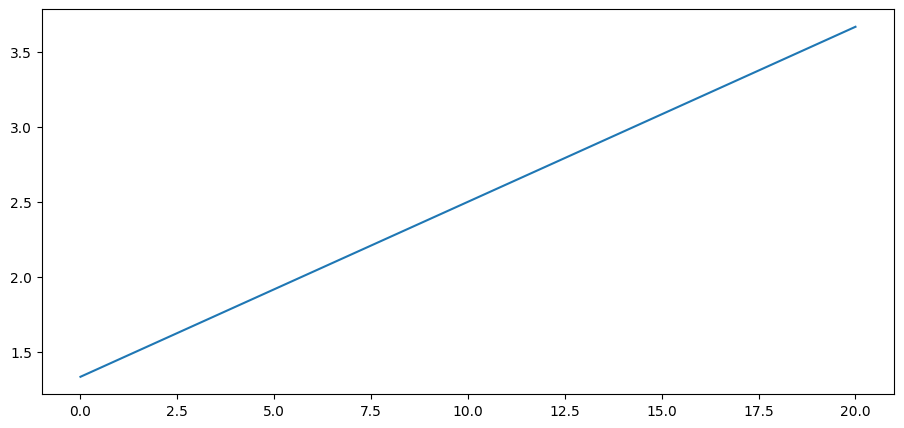

In [18]:
#parameters 
beta = 0.95 
r = 0.04
mu = 0.5 
rho = 0.8
sigma_e = 0.1 
sigma_u = 2 #degree of risk avesion 
error=[]

def utility(c):
    u = (c**(1-sigma_u)) / (1- sigma_u) 
    return u 


def solv_vfi_2(a_grid, V0):
    tol = 1e-13
    max_iterations = 500
    
    V0 = V0
    V = np.zeros((a_size, y_size))
    policy = np.zeros((a_size, y_size))
    iterations=0
    errors = np.empty(shape=(1,1))
    
    mc = qe.rouwenhorst(n=y_size, mu=mu , rho=rho, sigma=sigma_e) # use y_site since y is stochastic  #What is ybar, ie what value? # How to incorporate the error term?
    P = mc.P #Transition Matrix 
    y_grid = mc.state_values #Transition Matrix of income 
    
    while True:
        iterations +=1 
        
        # Step 1: Calcualte Expectations 
        EV = V @ P
        print(EV)
        
        #Step 2: Update Bellman Equations 
        update_bellman2(V, policy, a_grid, y_grid, EV)
        
        # Step 3: Check for convergence 
        eps_abs = abs(V-V0)
        eps = np.amax(eps_abs)
        error.append(eps)
    
        if eps < tol:
            break 
        if iterations > max_iterations:
            break 
        V0=V
    
    return V, policy, iterations, errors, c_grid, y_grid
    
    
def update_bellman2( V, policy, a_grid, y_grid, EV):
    for ai, yi in np.ndindex((a_size, y_size)):
        # extract k and A values from the grid parameters
        a, y = a_grid[ai], np.exp(y_grid[yi])
        
        # 'Cash on hand'
        z = (1+r) * a + y     # Cash = Asset Value + income 
        a_prime = a_grid 
        c = z - a_prime
        
        # calculate the value function and policy for this (k, A) pair
        value = utility(c) + beta * EV[:, yi]
        vmax, pol_index = np.max(value), np.argmax(value)
        pol = a_grid[pol_index]
        
        # store the value and policy
        V[ai, yi] = vmax
        policy[ai, yi] = pol
        EV = V
    return 
    

a_size = 50
y_size = 50
c_size = 50

c_grid = np.linspace(1e-6, 20, c_size)
a_grid = np.linspace(0, 20, a_size)

V=np.zeros((y_size, a_size))
V0=np.zeros((y_size, a_size))
c=np.zeros((y_size, a_size))
a=np.zeros((y_size, a_size))

V0 = np.zeros((a_size, y_size))


solution = solv_vfi_2(a_grid, V0)  

plt.plot(solution[4], solution[5])

### Part b

In [19]:
 np.sum(P, axis=1) # all columns sum to 1 
col_l = round(y_size/2) #find middle column in probabilites 
col_u = col_l +1
mid_P= P[ : , col_l:col_u] # isolate the middle column in incomes 

prop = 1 * np.cumsum(mid_P) / (sum(mid_P)) #find CDF of median income path
plt.plot(prop) #plot CDF


draws=[] #draws shows the index at the income grid at which each of the 5 individuals will start 
uni_draws = np.random.uniform(size=5)
for i in range(0,5):
    draw_i = np.searchsorted(prop, uni_draws[i], side='left')
    draws.append(draw_i)


#!!! INSERT LOOP FOR EACH OF THE 5 PEOPLE 

# ?? Where do we choose the initial value of y in the loop ? 


NameError: name 'P' is not defined

### Part c


#### by adding more observations (10000 workers) and 200 time periods, we would expect the asset holdings of all workers to converge towards a steady state. Workers accumulate more and more wealth until they all have similar shares of wealth. Workers which start of poor will save more initially to increase consumption in the future Workers who start of rich will save comparatively little at first and consume relatively more. Eventually all workers experience similar levels of consumption smoothing. Consider the RCK Model, all households will eventually reach the same level of consumption in a smooth pattern. The time it takes to reach this smooth level depends on the initial starting value. Due to shocks in income, the path will not be 100% smooth however it will be more or less smooth in the long run as assets yield risk-free returns. 

### Part d

#### Repeat analysis above however change z = 0.75((1+r)*a + y ). We should be able to run code just like before however now with new BC which incorporates the taxation . We must assume taxation is spent on goods which cannot be bought on the market, hence they do not affect the utility of the individual (if government expenditure was spent on market goods, eg food vouchers, there might be substitution effect and more money will be saved rather than spend on consumption)

### Part e

#### To reach the same level of taxation revenue as in Q2d but only taking labour income, the taxation rate must by higher than 25%. Households may start to prefer to save more in order to live of return on savings as these are not taxed (consumers are risk averse, hence aim for income smoothing), which can be achieved by saving more ad relying on un-taxed capital income from savings. We would expect savings and welfare to differe between the two systems. System 2 would have higher savings and lower utility compared to the System 1.